In [174]:
from transformers import DistilBertForSequenceClassification, AutoTokenizer
import torch
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [175]:
def plot_sentiment_probs(labels, probabilities):
    plt.figure(figsize=(10, 6))
    plt.bar(labels, probabilities, color='lightcoral')
    plt.xlabel('labels')
    plt.ylabel('probability')
    plt.title('sentiment probs')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    plt.grid(axis='x', linestyle='--', alpha=.7)
    plt.tight_layout
    plt.show()

In [176]:
model = DistilBertForSequenceClassification.from_pretrained('iwasgoingto/sentiment_analyzer')
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

In [177]:
def predict_sentiment(text, model, tokenizer, device):
    
    model.to(device)
    model.eval()

    inputs = tokenizer(
        text,
        padding='max_length',
        truncation=True,
        max_length=512,
        return_tensors='pt'
    )
    inputs = {k: v for k, v in inputs.items() if k != 'token_type_ids'}
    inputs = {k: v.to(device) for k, v in inputs.items()}
    
    with torch.no_grad():
        outputs = model(**inputs)
        
        # print(f"Outputs type: {type(outputs)}")
        # print(f"Outputs: {outputs}")
        
        predictions = torch.sigmoid(outputs.logits)
        # linear_layer = torch.nn.Linear(outputs.pooler_output.shape[1], 28).to(device)
        # predictions = torch.sigmoid(linear_layer(outputs.pooler_output))
        
        
    predicted_labels = (predictions > .3).int()
    
    predicted_indicies = torch.where(predicted_labels[0] == 1)[0].tolist()
    
    return predicted_indicies, predictions[0]

In [178]:
class_labels = {          
    0: 'admiration',
    1: 'amusement',
    2: 'anger',
    3: 'annoyance',
    4: 'approval',
    5: 'caring',
    6: 'confusion',
    7: 'curiosity',
    8: 'desire',
    9: 'disappointment',
    10: 'disapproval',
    11: 'disgust',
    12: 'embarrassment', 
    13: 'excitement',
    14: 'fear',
    15: 'gratitude',
    16: 'grief',
    17: 'joy',
    18: 'love',
    19: 'nervousness',
    20: 'optimism',
    21: 'pride',
    22: 'realization',
    23: 'relief',
    24: 'remorse',
    25: 'sadness',
    26: 'surprise',
    27: 'neutral'
}


Input: huh?

Top 3 Predicted Sentiments:
- neutral: 0.5847
- curiosity: 0.2099
- confusion: 0.0805


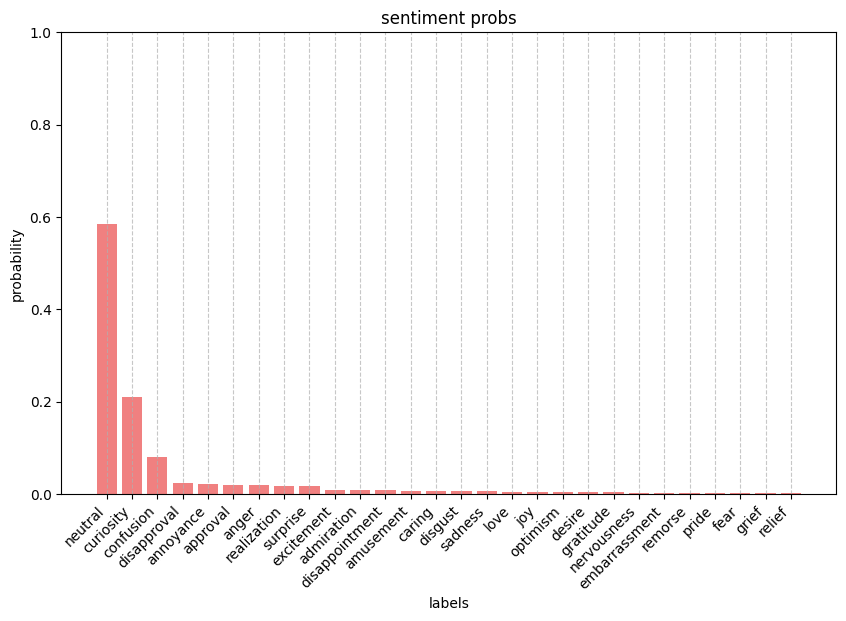

In [233]:
text = input()
print(f'Input: {text}\n')

labels, probabilities = predict_sentiment(text, model, tokenizer, device)

probabilities = probabilities.tolist()
top_3_prob = sorted(range(len(probabilities)), key=lambda i: probabilities[i], reverse=True)[:3]

all_labels = [class_labels.get(i, f'Label {i}') for i in range(len(probabilities))]
all_probs = probabilities

sorted_indices = sorted(range(len(all_probs)), key=lambda i: all_probs[i], reverse=True)
sorted_labels = [all_labels[i] for i in sorted_indices]
sorted_probs = [all_probs[i] for i in sorted_indices]

print('Top 3 Predicted Sentiments:')
for i in top_3_prob:
    label_name = class_labels.get(i, f'Label {i}')
    print(f"- {label_name}: {probabilities[i]:.4f}")  
    
plot_sentiment_probs(sorted_labels, sorted_probs)